In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

We have the ballons dataset. Suppose we want to classify whether a given balloon is inflated based on four attributes: the color of the balloon, the size of the balloon, the ‘act’ that the person holding the balloon is engaged in, and the age of the person holding the balloon.

In [2]:
df = pd.read_csv('balloons.csv')
df.head()

,Color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F


In [3]:
# Checking different type of values in each column
print(df.Color.unique())
print(df['size'].unique())
print(df.act.unique())
print(df.age.unique())

['YELLOW' 'PURPLE']
['SMALL' 'LARGE']
['STRETCH' 'DIP']
['ADULT' 'CHILD']


In [4]:
df_dt = df.copy()

In [5]:
# Convert categorical data into int representations of unique categories
for col in df_dt.columns:
  labels, uniques = pd.factorize(df_dt[col])
  df_dt[col] = labels

In [6]:
df_dt # Factorization has been done correctly

,Color,size,act,age,inflated
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
71,1,0,1,1,1
72,1,1,0,0,0
73,1,1,0,1,1
74,1,1,1,0,1


Factorization has changed True in inflated column to 0, so this change is something we have to keep in mind.

In [7]:
X = df_dt.drop(columns='inflated')
y = df_dt['inflated']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7391304347826086
[[9 2]
 [4 8]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("f1 score:", f1_score(y_test, predictions))

Precision: 0.8
Recall: 0.6666666666666666
f1 score: 0.7272727272727272


In [9]:
import graphviz
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=('Color','size','act','age'),
                                class_names=('0','1'),
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('balloons_dt',view=True)

'balloons_dt.png'

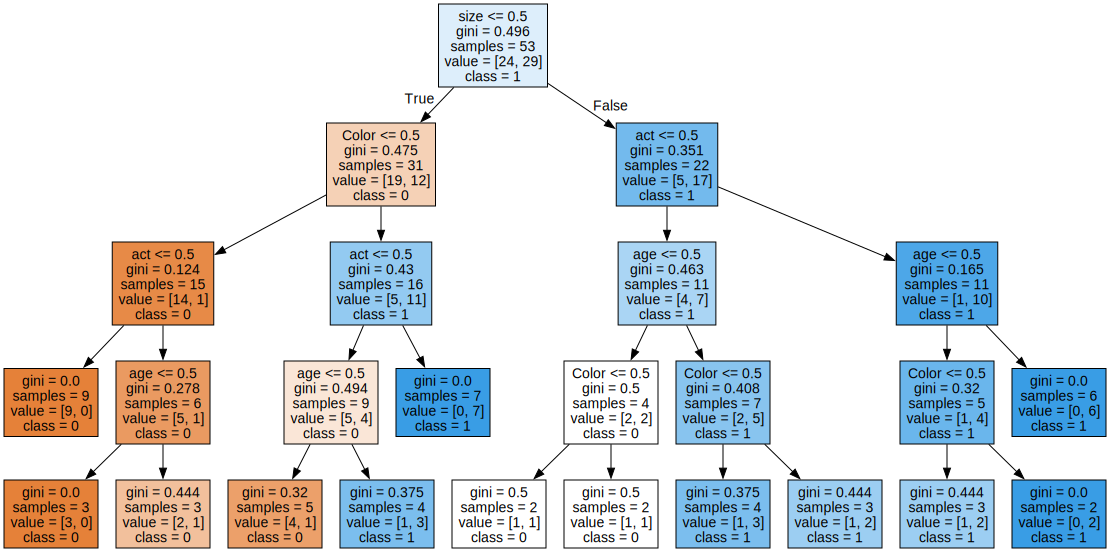

In [10]:
with open("balloons_dt") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Overall, we achieved 73.9% accuracy with the decision tree model for our problem statement. Result shows 80% precision and 66.67% recall. This model is more likely to give erroneous classification of false negatives, i.e. in situations when the ballon doesn't inflate (Class = 1), our model may say it inflates and classify it as class 0. 

We have used graphviz to build a simple, human interpretable decision tree. In decision tree algorithms, the goal is to reduce uncertainty or impurity at each node by splitting the data based on features. Gini impurity measures the degree of impurity or uncertainty in a set of data points regarding their class labels. If a dataset is perfectly pure, meaning all data points belong to the same class, the Gini impurity is 0, indicating no uncertainty. On the other hand, if the dataset is evenly distributed among different classes, the Gini impurity is at its maximum (0.5 for binary classification), indicating high uncertainty.